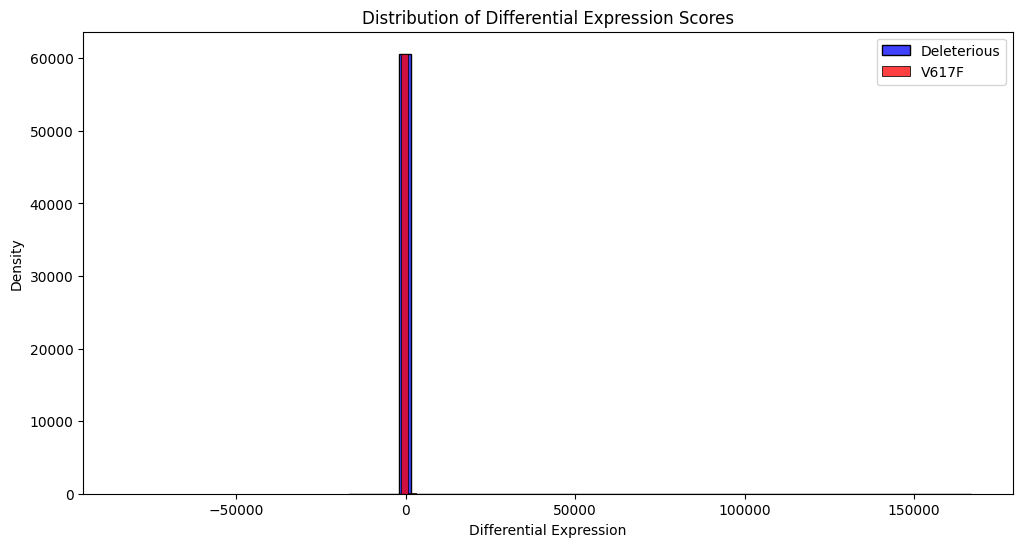

,d1.tsv,d10.tsv,d11.tsv,d12.tsv,d13.tsv,d14.tsv,d15.tsv,d16.tsv,d17.tsv,d18.tsv,...,d31.tsv,d32.tsv,d4.tsv,d5.tsv,d6.tsv,d7.tsv,d8.tsv,d9.tsv,average,diff_expression
count,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,...,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000
mean,16.485328,16.485328,16.485328,16.485328,16.485328,16.485328,16.485328,16.485328,16.485328,16.485328,...,16.485328,16.485328,16.485328,16.485328,16.485328,16.485328,16.485328,16.485328,16.485328,0.775364
std,1488.255346,882.468374,1370.334407,1293.211996,1413.753831,1310.745418,293.325738,1243.621706,1050.747519,1413.295030,...,1706.438603,1759.893748,266.811679,1253.779773,404.009807,992.713419,1074.425069,916.700284,1023.928057,694.676576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16680.782159
25%,0.000000,0.000000,0.035800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.677625,0.000000,0.000000,0.134905,-0.335728
50%,0.128050,0.130400,0.207400,0.105300,0.118000,0.096500,0.881750,0.340500,0.147750,0.084300,...,0.073100,0.081800,0.089100,0.105100,0.673050,2.391400,0.121100,0.335000,0.676961,0.048662
75%,1.853975,2.527550,1.974925,2.301300,2.302800,1.896925,8.480525,4.679275,3.033475,1.870775,...,1.444675,2.023800,2.113550,2.121150,7.158800,5.845700,2.166125,4.179575,4.578763,0.353575
max,363977.679800,206560.497700,336001.618500,315997.283600,347032.451200,321394.486100,31720.061200,303788.955400,255547.472300,345188.886400,...,409096.823900,432634.452500,32322.842200,306520.127200,45914.297100,229814.604600,261091.478300,223605.281900,249549.835331,166724.710331


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
deleterious_file = 'Deleterious/deleterious.tsv'
v617f_file = 'V617F/v617f.tsv'
baseline_file = 'baseline/gene_mean_expression.tsv'

# Load data with gene_id as string and other columns as float
baseline_df = pd.read_csv(baseline_file, sep='\s+', dtype={'gene_id': str}, engine='python')
deleterious_df = pd.read_csv(deleterious_file, sep='\s+', dtype={'gene_id': str}, engine='python')
v617f_df = pd.read_csv(v617f_file, sep='\s+', dtype={'gene_id': str}, engine='python')

# Convert other columns to float
for df in [baseline_df, deleterious_df, v617f_df]:
    df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)

# Calculate the differential expression for deleterious and v617f
deleterious_df['diff_expression'] = deleterious_df['average'] - baseline_df['trimmed_mean_expression']
v617f_df['diff_expression'] = v617f_df['average'] - baseline_df['trimmed_mean_expression']

# Optimize plotting by using a smaller number of bins and avoiding KDE for large datasets
plt.figure(figsize=(12, 6))
sns.histplot(deleterious_df['diff_expression'], bins=50, color='blue', label='Deleterious', kde=False)
sns.histplot(v617f_df['diff_expression'], bins=50, color='red', label='V617F', kde=False)
plt.title('Distribution of Differential Expression Scores')
plt.xlabel('Differential Expression')
plt.ylabel('Density')
plt.legend()
plt.show()

deleterious_df.describe()


In [12]:
from scipy.stats import zscore

# Correctly calculate differential expression using the 'average' column
deleterious_df['diff_expression'] = deleterious_df['average'] - baseline_df['trimmed_mean_expression']
v617f_df['diff_expression'] = v617f_df['average'] - baseline_df['trimmed_mean_expression']

# Calculate Z-scores for differential expression
deleterious_df['zscore'] = zscore(deleterious_df['diff_expression'])
v617f_df['zscore'] = zscore(v617f_df['diff_expression'])

# Sort by zscore to find the most consistently over/underexpressed
sorted_deleterious = deleterious_df.sort_values(by='zscore', ascending=False)
sorted_v617f = v617f_df.sort_values(by='zscore', ascending=False)

# Create a DataFrame showing the top and bottom consistently expressed genes
consistent_overexpressed_deleterious = sorted_deleterious.head(10)
consistent_underexpressed_deleterious = sorted_deleterious.tail(10)

consistent_overexpressed_v617f = sorted_v617f.head(10)
consistent_underexpressed_v617f = sorted_v617f.tail(10)

print("Most Consistently Overexpressed Genes in Deleterious Mutation:")
display(consistent_overexpressed_deleterious[['gene_id', 'diff_expression', 'zscore']])

print("\nMost Consistently Underexpressed Genes in Deleterious Mutation:")
display(consistent_underexpressed_deleterious[['gene_id', 'diff_expression', 'zscore']])

print("\nMost Consistently Overexpressed Genes in V617F Mutation:")
display(consistent_overexpressed_v617f[['gene_id', 'diff_expression', 'zscore']])

print("\nMost Consistently Underexpressed Genes in V617F Mutation:")
display(consistent_underexpressed_v617f[['gene_id', 'diff_expression', 'zscore']])


Most Consistently Overexpressed Genes in Deleterious Mutation:


,gene_id,diff_expression,zscore
53691,ENSG00000276168.1,166724.710331,240.004219
18421,ENSG00000200087.1,12571.946206,18.096586
19535,ENSG00000202538.1,11024.190076,15.868544
21832,ENSG00000212232.1,8093.784949,11.650136
47555,ENSG00000263934.5,4811.712064,6.925491
19319,ENSG00000202058.1,3971.123387,5.715438
18742,ENSG00000200795.1,3605.130835,5.188580
40676,ENSG00000252835.1,3233.157125,4.653113
47466,ENSG00000263740.2,3017.147125,4.342160
40117,ENSG00000252010.1,2982.822297,4.292748



Most Consistently Underexpressed Genes in Deleterious Mutation:


,gene_id,diff_expression,zscore
17931,ENSG00000198899.2,-5771.683166,-8.309631
17854,ENSG00000198763.3,-6366.935784,-9.166516
10947,ENSG00000163220.11,-6777.776156,-9.757933
17833,ENSG00000198727.2,-7171.902109,-10.325289
21426,ENSG00000210082.2,-7310.184688,-10.524351
17925,ENSG00000198888.2,-7632.469391,-10.988290
17955,ENSG00000198938.2,-7856.131475,-11.310258
17825,ENSG00000198712.1,-9728.703634,-14.005884
17923,ENSG00000198886.2,-9813.333775,-14.127711
17874,ENSG00000198804.2,-16680.782159,-24.013614



Most Consistently Overexpressed Genes in V617F Mutation:


,gene_id,diff_expression,zscore
10277,ENSG00000158874.11,27073.060256,69.869698
21426,ENSG00000210082.2,21459.818450,55.382723
1719,ENSG00000087086.15,17253.170100,44.525965
17825,ENSG00000198712.1,9066.185425,23.396528
4045,ENSG00000112306.8,8216.807325,21.204404
21462,ENSG00000211459.2,6814.358150,17.584883
4776,ENSG00000118137.10,6450.798547,16.646588
11075,ENSG00000163631.17,6009.715278,15.508215
17357,ENSG00000197249.14,5778.200720,14.910709
17896,ENSG00000198840.2,3557.517550,9.179443



Most Consistently Underexpressed Genes in V617F Mutation:


,gene_id,diff_expression,zscore
47625,ENSG00000264063.1,-1240.592000,-3.203792
1316,ENSG00000075624.17,-1241.928700,-3.207242
5316,ENSG00000122862.5,-2515.929700,-6.495256
8421,ENSG00000143546.10,-2635.600700,-6.804110
17833,ENSG00000198727.2,-2836.740925,-7.323224
1875,ENSG00000090382.7,-4142.749350,-10.693845
39811,ENSG00000251562.8,-4211.118300,-10.870295
10947,ENSG00000163220.11,-6382.674200,-16.474771
37327,ENSG00000244734.4,-9212.159725,-23.777269
53691,ENSG00000276168.1,-82605.311875,-213.194503


In [13]:
from scipy.stats import zscore

# Correctly calculate differential expression using the 'average' column
deleterious_df['diff_expression'] = deleterious_df['average'] - baseline_df['trimmed_mean_expression']
v617f_df['diff_expression'] = v617f_df['average'] - baseline_df['trimmed_mean_expression']

# Calculate Z-scores for differential expression
deleterious_df['zscore'] = zscore(deleterious_df['diff_expression'])
v617f_df['zscore'] = zscore(v617f_df['diff_expression'])

# Sort by zscore to find the most consistently over/underexpressed
sorted_deleterious = deleterious_df.sort_values(by='zscore', ascending=False)
sorted_v617f = v617f_df.sort_values(by='zscore', ascending=False)

# Create a DataFrame showing the top and bottom consistently expressed genes
consistent_overexpressed_deleterious = sorted_deleterious.head(10)
consistent_underexpressed_deleterious = sorted_deleterious.tail(10)

consistent_overexpressed_v617f = sorted_v617f.head(10)
consistent_underexpressed_v617f = sorted_v617f.tail(10)

print("Most Consistently Overexpressed Genes in Deleterious Mutation:")
display(consistent_overexpressed_deleterious[['gene_id', 'diff_expression', 'zscore']])

print("\nMost Consistently Underexpressed Genes in Deleterious Mutation:")
display(consistent_underexpressed_deleterious[['gene_id', 'diff_expression', 'zscore']])

print("\nMost Consistently Overexpressed Genes in V617F Mutation:")
display(consistent_overexpressed_v617f[['gene_id', 'diff_expression', 'zscore']])

print("\nMost Consistently Underexpressed Genes in V617F Mutation:")
display(consistent_underexpressed_v617f[['gene_id', 'diff_expression', 'zscore']])


Most Consistently Overexpressed Genes in Deleterious Mutation:


,gene_id,diff_expression,zscore
53691,ENSG00000276168.1,166724.710331,240.004219
18421,ENSG00000200087.1,12571.946206,18.096586
19535,ENSG00000202538.1,11024.190076,15.868544
21832,ENSG00000212232.1,8093.784949,11.650136
47555,ENSG00000263934.5,4811.712064,6.925491
19319,ENSG00000202058.1,3971.123387,5.715438
18742,ENSG00000200795.1,3605.130835,5.188580
40676,ENSG00000252835.1,3233.157125,4.653113
47466,ENSG00000263740.2,3017.147125,4.342160
40117,ENSG00000252010.1,2982.822297,4.292748



Most Consistently Underexpressed Genes in Deleterious Mutation:


,gene_id,diff_expression,zscore
17931,ENSG00000198899.2,-5771.683166,-8.309631
17854,ENSG00000198763.3,-6366.935784,-9.166516
10947,ENSG00000163220.11,-6777.776156,-9.757933
17833,ENSG00000198727.2,-7171.902109,-10.325289
21426,ENSG00000210082.2,-7310.184688,-10.524351
17925,ENSG00000198888.2,-7632.469391,-10.988290
17955,ENSG00000198938.2,-7856.131475,-11.310258
17825,ENSG00000198712.1,-9728.703634,-14.005884
17923,ENSG00000198886.2,-9813.333775,-14.127711
17874,ENSG00000198804.2,-16680.782159,-24.013614



Most Consistently Overexpressed Genes in V617F Mutation:


,gene_id,diff_expression,zscore
10277,ENSG00000158874.11,27073.060256,69.869698
21426,ENSG00000210082.2,21459.818450,55.382723
1719,ENSG00000087086.15,17253.170100,44.525965
17825,ENSG00000198712.1,9066.185425,23.396528
4045,ENSG00000112306.8,8216.807325,21.204404
21462,ENSG00000211459.2,6814.358150,17.584883
4776,ENSG00000118137.10,6450.798547,16.646588
11075,ENSG00000163631.17,6009.715278,15.508215
17357,ENSG00000197249.14,5778.200720,14.910709
17896,ENSG00000198840.2,3557.517550,9.179443



Most Consistently Underexpressed Genes in V617F Mutation:


,gene_id,diff_expression,zscore
47625,ENSG00000264063.1,-1240.592000,-3.203792
1316,ENSG00000075624.17,-1241.928700,-3.207242
5316,ENSG00000122862.5,-2515.929700,-6.495256
8421,ENSG00000143546.10,-2635.600700,-6.804110
17833,ENSG00000198727.2,-2836.740925,-7.323224
1875,ENSG00000090382.7,-4142.749350,-10.693845
39811,ENSG00000251562.8,-4211.118300,-10.870295
10947,ENSG00000163220.11,-6382.674200,-16.474771
37327,ENSG00000244734.4,-9212.159725,-23.777269
53691,ENSG00000276168.1,-82605.311875,-213.194503


# What's on my mind

Since the data is so voltile - i am going to do an analysis2.ipynb and there we will trim the data such that if the expressino profiles are too high - we will just trim it out. That way we have at least workable data